# Plot for earnings based on marital status and gender in the UKHLS dataset

### Import library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyreadstat

### Read the data into memory

In [7]:
a_indresp, meta_wave1 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/a_indresp.dta')
b_indresp, meta_wave2 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/b_indresp.dta')
c_indresp, meta_wave3 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/c_indresp.dta', encoding='ISO-8859-1')
d_indresp, meta_wave4 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/d_indresp.dta')
e_indresp, meta_wave5 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/e_indresp.dta', encoding='ISO-8859-1')
f_indresp, meta_wave6 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/f_indresp.dta')
g_indresp, meta_wave7 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/g_indresp.dta')
h_indresp, meta_wave8 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/h_indresp.dta')
i_indresp, meta_wave9 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/i_indresp.dta')
j_indresp, meta_wave10 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/j_indresp.dta')
k_indresp, meta_wave11 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/k_indresp.dta')
l_indresp, meta_wave12 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/l_indresp.dta')
m_indresp, meta_wave13 = pyreadstat.read_dta('/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/m_indresp.dta')


### Inspect meta data

In [18]:
print(a_indresp.columns)
print(meta_wave1.variable_value_labels)


Index(['pidp', 'a_hidp', 'a_pno', 'a_hhorig', 'a_memorig', 'a_psu', 'a_strata',
       'a_sampst', 'a_month', 'a_ivfio',
       ...
       'a_paynu_if', 'a_seearngrs_if', 'a_fiyrinvinc_if', 'a_fibenothr_if',
       'a_fimnlabgrs_if', 'a_fimngrs_if', 'a_indpxus_xw', 'a_indinus_xw',
       'a_indscus_xw', 'a_ind5mus_xw'],
      dtype='object', length=1401)
{'a_hidp': {-9: 'missing', -8: 'inapplicable', -7: 'proxy respondent', -2: 'refusal', -1: "don't know"}, 'a_pno': {-9: 'missing', -8: 'inapplicable', -7: 'proxy respondent', -2: 'refusal', -1: "don't know"}, 'a_hhorig': {-9: 'missing', -8: 'inapplicable', -7: 'proxy respondent', -2: 'refusal', -1: "don't know", 1: 'ukhls gb 2009-10', 2: 'ukhls ni 2009-10', 3: 'bhps gb 1991', 4: 'bhps sco 1999', 5: 'bhps wal 1999', 6: 'bhps ni 2001', 7: 'ukhls emboost 2009-10', 8: 'ukhls iemb 2014-15', 11: 'ip original sample 2008', 12: 'ip4 refreshment sample 2011', 13: 'ip7 refreshment sample 2014', 14: 'ECHP - SCPR', 15: 'ECHP - ONS', 16: 'ECHP - NI'

## Merge into new dataframe

### Merge data only with relavant variables

In [31]:
# Create a list of dataframes
wave_dfs = [a_indresp, b_indresp, c_indresp, d_indresp, e_indresp, 
            f_indresp, g_indresp, h_indresp, i_indresp, j_indresp, 
            k_indresp, l_indresp, m_indresp]

# Define wave prefix
wave_prefixes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']

# Define other parts of variable names
other_variable_parts = ['sex', 'birthy', 'mlstat', 'marstat', 'mastat_dv']

# Initialize the merged DataFrame with the 'pidp' column
merged_df = pd.DataFrame(wave_dfs[0]['pidp'])

for i, (df, prefix) in enumerate(zip(wave_dfs, wave_prefixes)):
    # Define the income variable for this wave
    income_var = f'{prefix}_prfitba_w{i+1}'
    # Define the variable names for this wave using list comprehension
    variables = [income_var] + [f'{prefix}_{vpart}' for vpart in other_variable_parts]
    # Include 'pidp' in the list of variables to merge on
    variables = ['pidp'] + variables
    # Select the variables from the wave's DataFrame
    subset_df = df[variables]
    # Merge with the main DataFrame on 'pidp'
    merged_df = pd.merge(merged_df, subset_df, on='pidp', how='outer')

### Save to .csv

In [33]:
merged_df.to_csv('merged_data.csv', index=False)

# Check the first few rows of the saved file
print(pd.read_csv('merged_data.csv').head())

     pidp  a_prfitba_w1  a_sex  a_birthy  a_mlstat  a_marstat  a_mastat_dv  \
0   22445           NaN    NaN       NaN       NaN        NaN          NaN   
1   29925           NaN    NaN       NaN       NaN        NaN          NaN   
2   76165           NaN    NaN       NaN       NaN        NaN          NaN   
3  223725           NaN    NaN       NaN       NaN        NaN          NaN   
4  280165           NaN    NaN       NaN       NaN        NaN          NaN   

   b_prfitba_w2  b_sex  b_birthy  ...  l_birthy  l_mlstat  l_marstat  \
0           NaN    NaN       NaN  ...    1984.0      -8.0        2.0   
1           NaN    NaN       NaN  ...    1977.0      -8.0        5.0   
2           NaN    NaN       NaN  ...    1982.0      -8.0        2.0   
3           NaN    NaN       NaN  ...       NaN       NaN        NaN   
4          -8.0    2.0    1979.0  ...    1979.0      -8.0        2.0   

   l_mastat_dv  m_prfitba_w13  m_sex  m_birthy  m_mlstat  m_marstat  \
0          2.0           -8

#### We'll further filter the data by removing -9, -8, -2, and -1. 

In [53]:
import pandas as pd

# Load the merged data
merged_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/Code/merged_data.csv')

# Output the total number of rows before any filtering
print(f"Total number of rows before filtering: {len(merged_df)}")

# Check counts for sex
print("Value counts for 'a_sex':")
print(merged_df['a_sex'].value_counts(dropna=False))

# Check counts for a sample income column (for 'a' wave)
print("Value counts for 'a_prfitba_w1':")
print(merged_df['a_prfitba_w1'].value_counts(dropna=False).sort_index())


Total number of rows before filtering: 89348
Value counts for 'a_sex':
a_sex
NaN    38354
2.0    27792
1.0    23202
Name: count, dtype: int64
Value counts for 'a_prfitba_w1':
a_prfitba_w1
-8.0     50078
-2.0        11
-1.0        14
 0.0        15
 1.0        13
 2.0        11
 3.0        11
 4.0        12
 5.0        16
 6.0        12
 7.0        14
 8.0        14
 9.0        23
 10.0       59
 11.0       50
 12.0       87
 13.0      121
 14.0      433
 NaN     38354
Name: count, dtype: int64


In [47]:
merged_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/Code/merged_data.csv')

# Keep only the rows where sex is not NaN
merged_df = merged_df[merged_df['a_sex'].notna()]

# Replace special codes with NaN in income columns
special_codes = [-9, -8, -2, -1]
merged_df[income_columns] = merged_df[income_columns].replace(special_codes, np.nan)

# Now, let's save this cleaned data
cleaned_file_path = '/Users/gavinqu/Desktop/School/Dissertation/Code/cleaned_merged_data.csv'
merged_df.to_csv(cleaned_file_path, index=False)

# Verify the cleaning by checking the non-null count for sex and the first income column
print(merged_df['a_sex'].notnull().sum())
print(merged_df['a_prfitba_w1'].notnull().sum())

merged_df.to_csv('cleaned_merged_data.csv', index=False)

50994
891


### Plot the graph of income level across waves for men and women

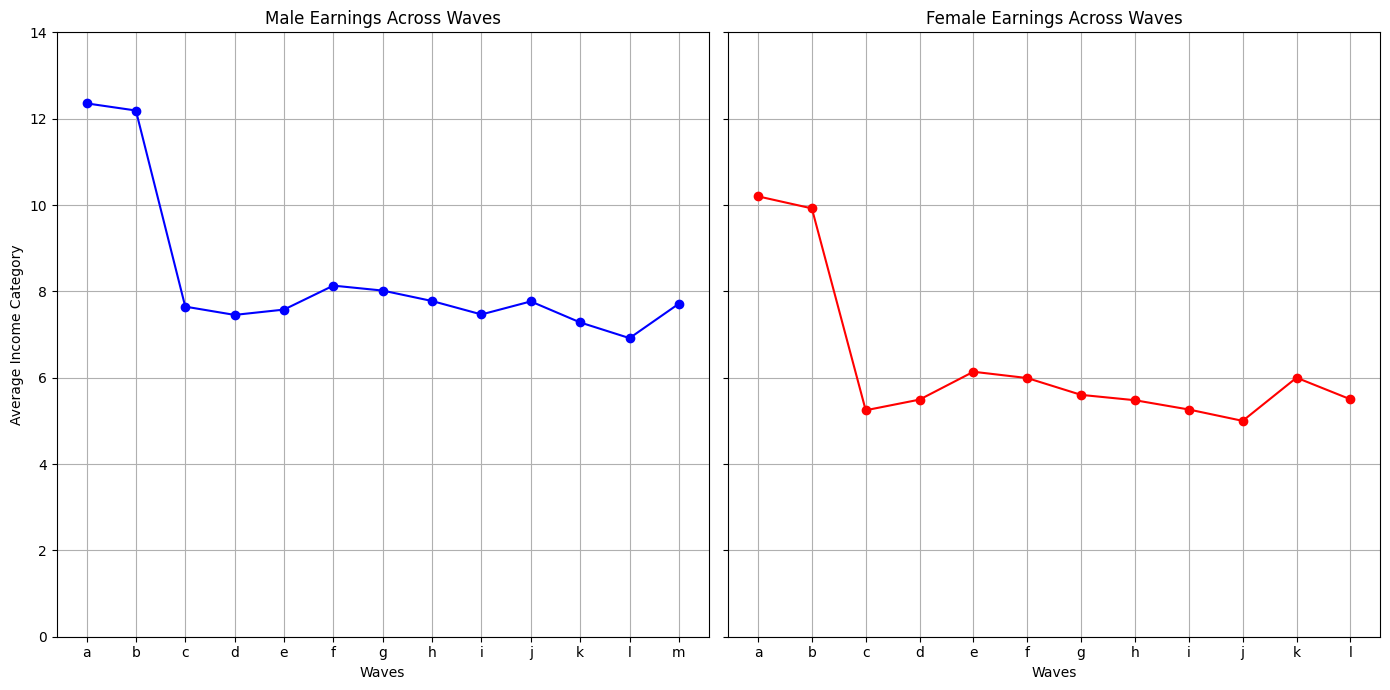

In [49]:
import matplotlib.pyplot as plt

# Get the list of income columns for all waves
income_columns = [f'{prefix}_prfitba_w{index+1}' for index, prefix in enumerate(wave_prefixes)]

# Create separate DataFrames for male and female
df_male = merged_df[merged_df['a_sex'] == 1][income_columns]
df_female = merged_df[merged_df['a_sex'] == 2][income_columns]

# Plot setup
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)

# Male earnings plot
axes[0].plot(wave_prefixes, df_male.mean(), marker='o', linestyle='-', color='blue')
axes[0].set_title('Male Earnings Across Waves')
axes[0].set_xlabel('Waves')
axes[0].set_ylabel('Average Income Category')
axes[0].set_ylim(0, 14)  
axes[0].grid(True)

# Female earnings plot
axes[1].plot(wave_prefixes, df_female.mean(), marker='o', linestyle='-', color='red')
axes[1].set_title('Female Earnings Across Waves')
axes[1].set_xlabel('Waves')
axes[1].set_ylim(0, 14)  
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


### Based on marriage instead

In [57]:
merged_df = pd.read_csv('merged_data.csv')

# Filter for valid sex and income values as before
merged_df = merged_df[(merged_df['a_sex'] == 1) | (merged_df['a_sex'] == 2)]
merged_df[income_columns] = merged_df[income_columns].applymap(lambda x: x if 0 <= x <= 14 else np.nan)

# Add a new column to store the wave of marriage
merged_df['wave_married'] = None

# Identify the wave of first marriage
for prefix in wave_prefixes:
    marstat_col = f'{prefix}_marstat'
    married = merged_df[marstat_col].isin([2, 3])
    not_already_married = merged_df['wave_married'].isna()
    merged_df.loc[married & not_already_married, 'wave_married'] = prefix

# Calculate income change after marriage for each individual
for i in range(len(wave_prefixes)-1):
    curr_wave = wave_prefixes[i]
    next_wave = wave_prefixes[i+1]

    curr_income_col = f'{curr_wave}_prfitba_w{i+1}'
    next_income_col = f'{next_wave}_prfitba_w{i+2}'

    # Individuals who got married in the current wave
    just_married = merged_df['wave_married'] == curr_wave

    # Calculate change in income
    merged_df.loc[just_married, 'income_change'] = merged_df[next_income_col] - merged_df[curr_income_col]

# Calculate average income change after marriage
avg_income_change_after_marriage = merged_df['income_change'].mean()

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_88798/1738350564.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df[income_columns] = merged_df[income_columns].applymap(lambda x: x if 0 <= x <= 14 else np.nan)


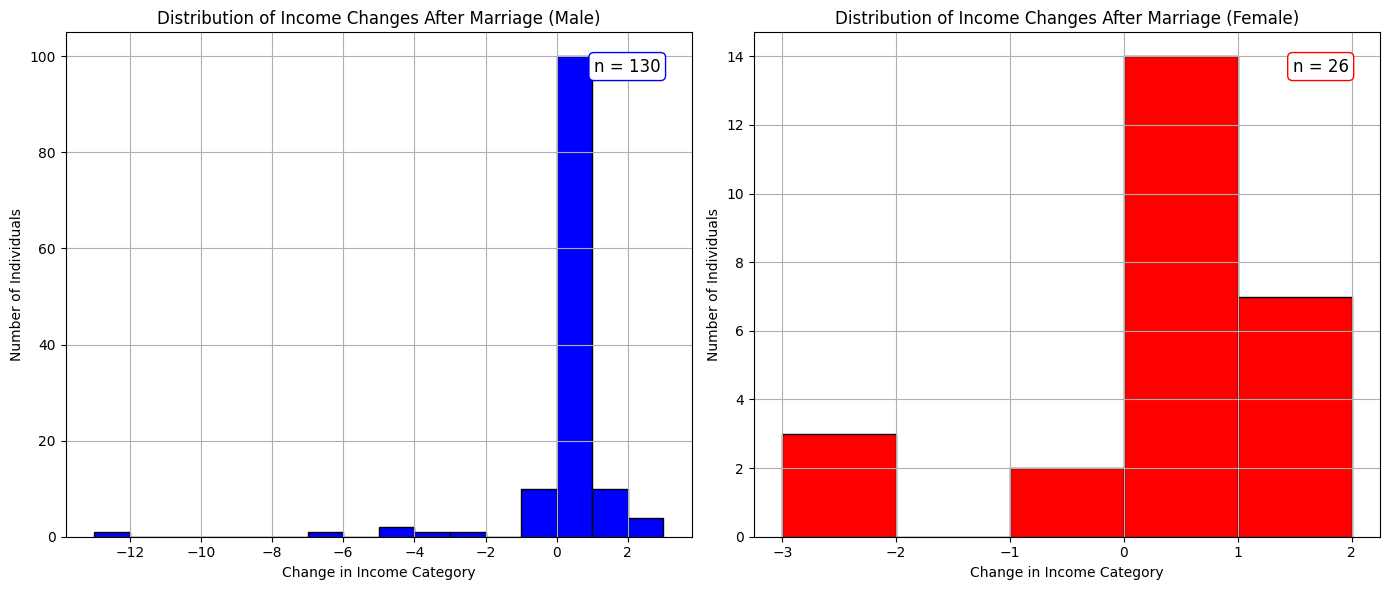

In [58]:
import matplotlib.pyplot as plt

# Create separate DataFrames for each sex
male_df = merged_df[(merged_df['a_sex'] == 1) & merged_df['income_change'].notna()]
female_df = merged_df[(merged_df['a_sex'] == 2) & merged_df['income_change'].notna()]

# Calculate the sample sizes
n_male = len(male_df)
n_female = len(female_df)

# Plotting the histograms with sample size information
plt.figure(figsize=(14, 6))

# Histogram for males
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
plt.hist(male_df['income_change'], bins=range(int(male_df['income_change'].min()), int(male_df['income_change'].max()) + 1), color='blue', edgecolor='black')
plt.title('Distribution of Income Changes After Marriage (Male)')
plt.xlabel('Change in Income Category')
plt.ylabel('Number of Individuals')
plt.text(0.95, 0.95, f'n = {n_male}', transform=plt.gca().transAxes, horizontalalignment='right', verticalalignment='top', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='blue', facecolor='white'))
plt.grid(True)

# Histogram for females
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
plt.hist(female_df['income_change'], bins=range(int(female_df['income_change'].min()), int(female_df['income_change'].max()) + 1), color='red', edgecolor='black')
plt.title('Distribution of Income Changes After Marriage (Female)')
plt.xlabel('Change in Income Category')
plt.ylabel('Number of Individuals')
plt.text(0.95, 0.95, f'n = {n_female}', transform=plt.gca().transAxes, horizontalalignment='right', verticalalignment='top', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white'))
plt.grid(True)

plt.tight_layout()
plt.show()